In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
from scipy.optimize import curve_fit
from collections import Counter

L = 266

In [2]:
def plot_seed1(seed1, seed, beta, T, L = L, time = 1):
    num = 100
    alpha = 0
    n=L*L
        
    # Define coordinates for plotting
    
    Y=np.array([[np.sqrt(3) * i / 2]* L for i in range(L)]).flatten()
    X=np.array([np.arange(L) -0.5 * i for i in range(L)]).flatten()
    
    for k,t in enumerate(T):


        try:
            f=open(f"F:\\CM\\Prjt2\\Simulation\\newUpdate\\vacancy\\runs\\{seed1}_seed_{seed}_T_{t}_beta_{beta}_xi_{num}_L_{L}_{time}.txt","r")
        except:
            f=open(f"F:\\CM\\Prjt2\\Simulation\\newUpdate\\vacancy\\runs\\{seed1}_seed_{seed}_T_{t}_beta_{beta}_xi_{num}_L_{L}_{time-1}.txt","r")

        Q1=np.zeros((L,L))
        Q2=np.zeros((L,L))
        Q3=np.zeros((L,L))
        s=np.zeros((n,3))
        Image=np.zeros((L,L,3))
        s=np.zeros((n,3)) #All spin vectors in a vector
        i=0
        for line in f:
            a=line.split("=")
            s[i]=[a[1],a[2],a[3]]
            i+=1

        S=np.zeros((L,L,3))  #All spin vectors in a 2d array
        for i in range(n):
            S[i//L][i%L]=s[i]
        Green,Blue,Red=np.zeros((L,L)),np.zeros((L,L)),np.zeros((L,L))
        Q=np.zeros((L,L))
        for i in range(L):
            for j in range(L):
                Red[i][j]=np.dot(S[i][j],S[i][(j+1)%L])
                Green[i][j]=np.dot(S[i][j],S[(i+1)%L][(j+1)%L])
                Blue[i][j]=np.dot(S[(i+1)%L][(j+1)%L],S[i][(j+1)%L])
                
                Q1[i][j]=(Red[i][j]+Blue[i][j]-2*Green[i][j])
                Q2[i][j]=(Green[i][j]+Blue[i][j]-2*Red[i][j])
                Q3[i][j]=(Red[i][j]+Green[i][j]-2*Blue[i][j])
                Image[i][j]=np.array([Q1[i][j],Q2[i][j],Q3[i][j]])

        fig,ax=plt.subplots(figsize=(6*np.sqrt(3) , 6))
        ax.scatter(X, Y, c = Image.clip(0, 1).reshape(-1, 3), s = 4)
        ax.set_title(f"T = {t}, J_1' = {beta}")


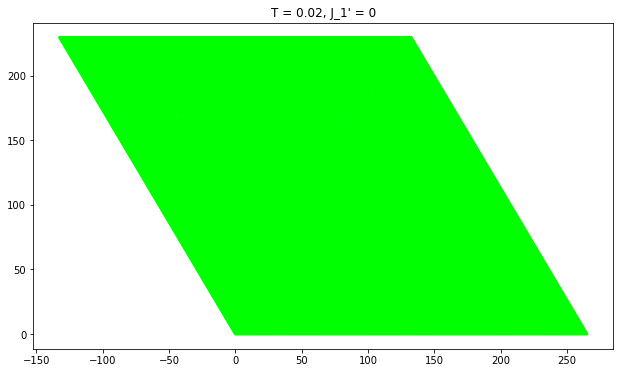

In [3]:
for seed in range(1,2):
    plot_seed1(1, seed, 0, [0.02])